# **Mục lục:**

## Phần 1: Giới thiệu
- **1.1 Bối cảnh**
- **1.2 Mục đích**
- **1.3 Giới thiệu về bộ dữ liệu**

## Phần 2: Khám phá tập dữ liệu
- **2.1 Tổng quan tập dữ liệu**
- **2.2 Tiền xử lý dữ liệu**
    - **Dữ liệu thiếu**
    - **Dữ liệu trùng lặp**
    
- **2.3 Phân tích mô tả đơn biến**
- **2.4 Phân tích mô tả đa biến**

## Phần 3: Mô hình hóa dữ liệu
- **3.1 Mã hóa dữ liệu**
- **3.2 Huấn luyện các mô hình dự đoán dữ liệu**
- **3.3 Đánh giá và chọn mô hình**
- **3.4 Đánh giá hiệu suất mô hình đã chọn dựa trên mô hình cơ bản**
- **3.5 Trực quan hóa kết quả**
- **3.6 Trực quan hóa mức đóng góp của biến dự đoán lên biến mục tiêu**

## Phần 4: Kết luận
- **4.1 Tóm tắt phát hiện**
- **4.2 Đề xuất giải pháp**


#**Phần 1: Giới thiệu:**

##1.1 Bối cảnh:

Bảo hiểm sức khỏe rất quan trọng trong việc bảo vệ sức khỏe của mỗi người. Ngày nay, nhu cầu mua bảo hiểm sức khỏe của khách hàng ngày càng cao dẫn đến có rất nhiều loại hình bảo hiểm sức khỏe khác nhau, từ bảo hiểm cơ bản đến bảo hiểm toàn diện, với các mức phí và quyền lợi riêng. Việc hiểu rõ các yếu tố ảnh hưởng đến chi phí bảo hiểm sẽ giúp công ty bảo hiểm định giá cung cấp một cách hợp lý và giúp khách hàng lựa chọn gói bảo hiểm phù hợp.

##1.2 Mục đích:

Phân tích các yếu tố ảnh hưởng lên phí bảo hiểm sức khỏe và xây dựng mô hình dự đoán chi phí bảo hiểm cho từng đặc điểm cá nhân riêng biệt của khách hàng giúp công ty tự động hóa quá trình tính toán chi phí, rút ngắn thời gian, giảm bớt chi phí tính toán đồng thời cung cấp thông tin có giá trị cho các chiến lược tiếp thị và phân phối sản phẩm bảo hiểm sau này.

##1.3 Giới thiệu về bộ dữ liệu:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Đọc Dữ liệu
pathline='/content/insurance_dataset.csv'
data=pd.read_csv(pathline)

In [6]:
# Xem 5 dòng đầu tiên của dữ liệu
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Phí bảo hiểm có thể bị ảnh hưởng bởi nhiều yếu tố nhưng ở bộ dữ liệu này, ta chỉ quan tâm đến các yếu tố gồm:
  + Biến giải thích: age (tuổi), sex (giới tính), bmi (chỉ số khối lượng cơ thể), children (số con), smoker ( tình trạng hút thuốc), region (khu vực cư trú).
  + Biến mục tiêu: charges (chi phí bảo hiểm).

Bộ dữ liệu này được lấy trên Kaggle.

# **Phần 2: Khám phá tập dữ liệu:**

##2.1 Tổng quan tập dữ liệu:

In [7]:
# Xem 5 dòng đầu tiên
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Thông tin mô tả tổng quan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


+ Bộ dữ liệu này gồm có 6 biến trong đó 5 biến dự đoán và 1 biến mục tiêu. Dưới đây là thông tin miêu tả về các biến:

| Tên biến | Mô Tả | Kiểu dữ liệu |
|--------|--------------------------------|------|
| age | Độ tuổi của khách hàng | số |
| sex | Giới tính của khách hàng | danh mục |
| bmi (Body Mass Index) | Chỉ số khối lượng cơ thể được tính theo công thức *BMI= Cân nặng (kg) / \(Chiều cao (m) )^2* | số |
| children | Số lượng con cái của khách hàng | danh mục |
| smoker | Có hút thuốc không (yes/no) | danh mục |
| region | Khu vực người mua bảo hiểm sinh sống | danh mục|
| charges | Phí phải trả để mua bảo hiểm (biến mục tiêu) | số |

In [9]:
# Hình dạng tập dữ liệu:
data.shape

(1338, 7)

Dataset này có 1338 hàng và 7 cột

In [10]:
# Phân tích mô tả dữ liệu dạng số:
round(data.describe(),2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


|**Biến** | **Mô tả**|
|---|-----------------|
| Age|  Tuổi có giá trị rơi vào khoảng 18-64|
| BMI|  Vùng giá trị rơi vào khoảng 15.96-53.13|
| Children| Số con rơi vào khoảng 0-5 con|
| Charges| Chi phí rơi vào khoảng 1121.87-63770.43 ( khoảng dao động rất rộng)|


In [11]:
# Phân tích mô tả dữ liệu dạng danh mục:
data.select_dtypes('object').describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


|**Biến**|**Mô tả**|
|----|-------------|
| Sex| Cột giới tính có 1338 hàng với 2 giá trị là male (nam) /female (nữ)|
| Smoker | Cột hút thuốc có 1338 hàng 2 giá trị yes (có)/ no (không)|
| Region|  + Cột vùng cư trú có 1338 hàng với 4 giá trị đại diện 'southwest', 'southeast', 'northwest', 'northeast'|



##2.2 Tiền xử lý dữ liệu:

###Dữ liệu thiếu

In [12]:
# Kiểm tra dữ liệu thiếu
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Không có dữ liệu thiếu

###Dữ liệu trùng lặp

In [13]:
# Kiểm tra dữ liệu trùng lặp
data.duplicated().sum()

1

Có 1 hàng dữ liệu trùng lặp. Ta tiến hành xem nó để nhận định là bản chất dữ liệu hay trùng lặp thật sự.

In [14]:
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Với tất cả đặc điểm giống nhau hoàn toàn (khác chỉ số nhưng chỉ số chỉ để phân biệt bản ghi khác nhau chứ không phải phân biệt dữ liệu) 2 bản ghi này là trùng lặp. Ta sẽ xóa bớt 1 bản.

In [15]:
# Xóa dữ liệu trùng lặp
data.drop_duplicates(inplace=True)

##2.3 Phân tích mô tả đơn biến:

In [16]:
# Hàm trực quan hóa:
def visualize(column):

  fig,ax=plt.subplots(1,2,figsize=(20,3))
  sns.boxplot(data=data,x=column, ax=ax[0])
  ax[0].grid(linestyle='--')
  ax[0].set_title('Đồ thị boxplot theo {}'.format(column))
  ax[0].axvline(np.mean(data[column]), color='r', label='Mean', linestyle='--')
  ax[0].legend()

  sns.histplot(data=data, x=column,ax=ax[1], kde=True,bins=20)
  ax[1].grid(linestyle='--')
  ax[1].set_title('Đồ thị phân phối xác suất theo {}'.format(column))
  ax[1].set_xlim(data[column].min(),data[column].max()+1)
  ax[1].set_ylabel('Mật độ phân phối')
  ax[1].axvline(np.mean(data[column]), color='r', label='Mean', linestyle='--')
  ax[1].axvline(np.median(data[column]), color='b', label='Median', linestyle='--')
  ax[1].legend()
  plt.show()

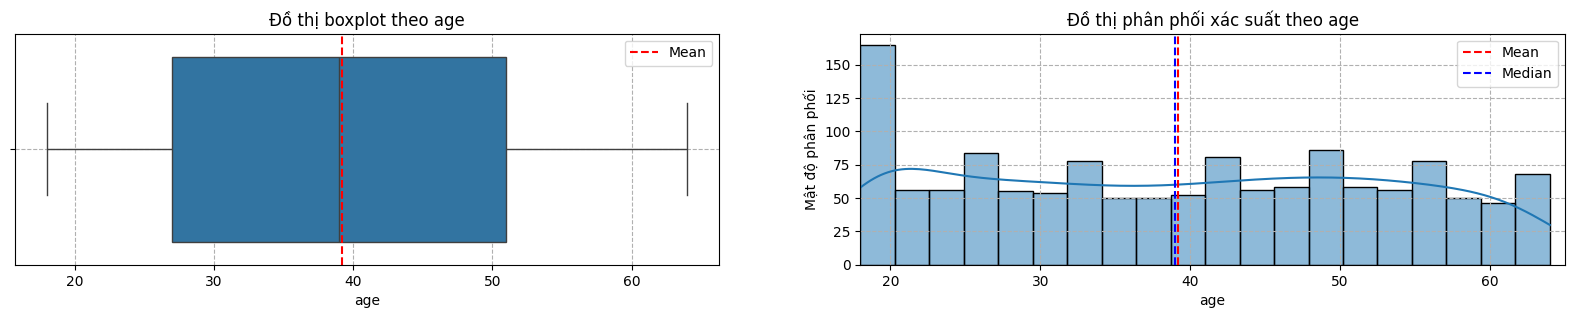

In [17]:
# Phân phối của cột Age:
visualize('age')

+ Tuổi trung bình của mẫu là khoảng 39.22 tuổi.
+ Có sự phân tán đáng kể với độ lệch chuẩn 14.04.
+ Khoảng tuổi từ 27 đến 51 chiếm phần lớn mẫu.
+ Nhìn 2 đồ thị trên ta thấy phân phối tuổi khá đều, không lệch (mean gần trùng với median), không có oulier.
+ Độ tuổi mua bảo hiểm nhiều nhất là 20 tuổi.
+ Các độ tuổi khác có tỷ lệ mua bảo hiểm gần bằng nhau, tuy nhiên đồ thị mật độ xác suất có vẻ giảm khi tuổi càng lớn. Có thể có 1 lý do gì đó dẫn đến việc người già mua bảo hiểm ngày càng ít (lý do có thể liên quan đến chi phí đắt hơn)

*Ghi chú: Phần phân tích kết hợp nhiều biến ta sẽ xem xét mối quan hệ của tuổi và giá phí bảo hiểm*


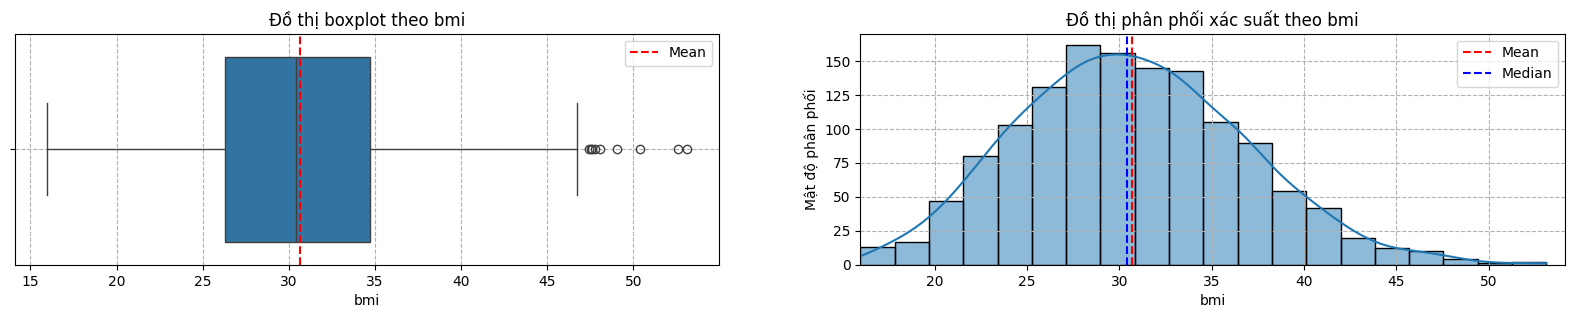

In [18]:
# Phân phối cột bmi:
visualize('bmi')

+ BMI trung bình là 30.66, có thể được xem là cao hơn so với tiêu chuẩn bình thường (18.5-24.9).
+ Có sự phân tán tương đối lớn với độ lệch chuẩn 6.10.
+ Phân vị thứ 75 có BMI là 34.70, cho thấy một số lượng lớn người có BMI cao.
+ Nhìn chung, chỉ số BMI có phân phối chuẩn (mean gần trùng median)
+ Có 1 số giá trị oulier
+ Giá trị có mật độ phân phối cao nhất là 30
+ Theo chuẩn BMI thì:
  + Mức bình thường: 18.5-24.9
  + Dưới 18.5: Thiếu cân
  + Từ 25-29.9: Thừa cân
  + Từ 30 trở lên: Béo phì

--> Phân phối chỉ số BMI của khác hàng cho thấy đa số khách hàng đang ở tình trạng thừa cân và béo phì.

*Ghi chú: Phần phân tích đa biến, ta sẽ xem xét mối quan hệ của việc thừa cân tác động lên giá chi phí bảo hiểm*


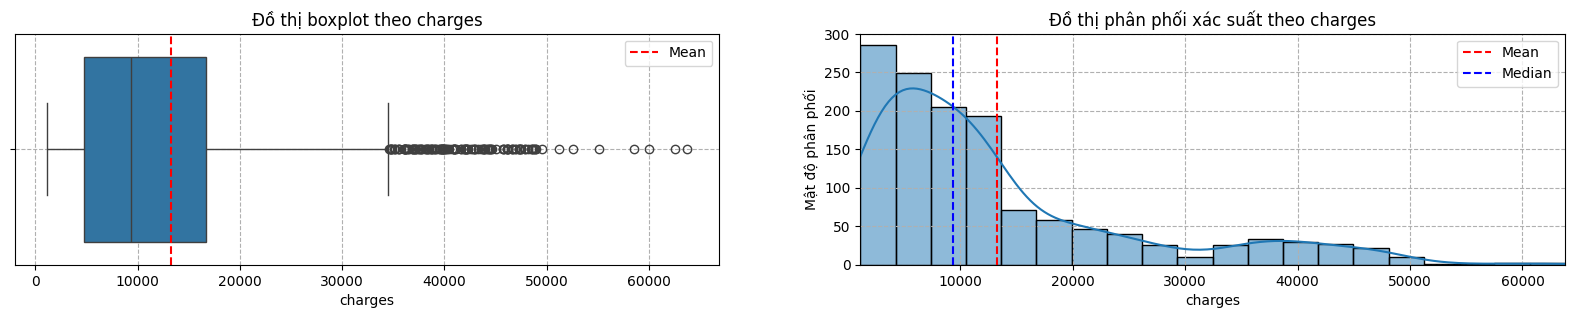

In [19]:
# Phân phối cột charges:
visualize('charges')

+ Chi phí trung bình là 13279.12, có sự phân tán rất lớn với độ lệch chuẩn 12110.36.
+ Chi phí cao nhất lên tới 63770.43, cho thấy có một số trường hợp chi phí rất cao, có thể là gói bảo hiểm đặc biệt.
+ Chi phí bảo hiểm có phân phối lệch phải (mean nằm cách phải khá đáng kể so với median) với sự xuất hiện của rất nhiều outlier
+ Đa số mức giá sẽ rơi vào khoảng <15.000 USD
+ Ngoài ra có 1 số gói bảo hiểm với chi phí khá cao rơi vào khoảng 40.000-60.000
+ Range phí bảo hiểm khá rộng

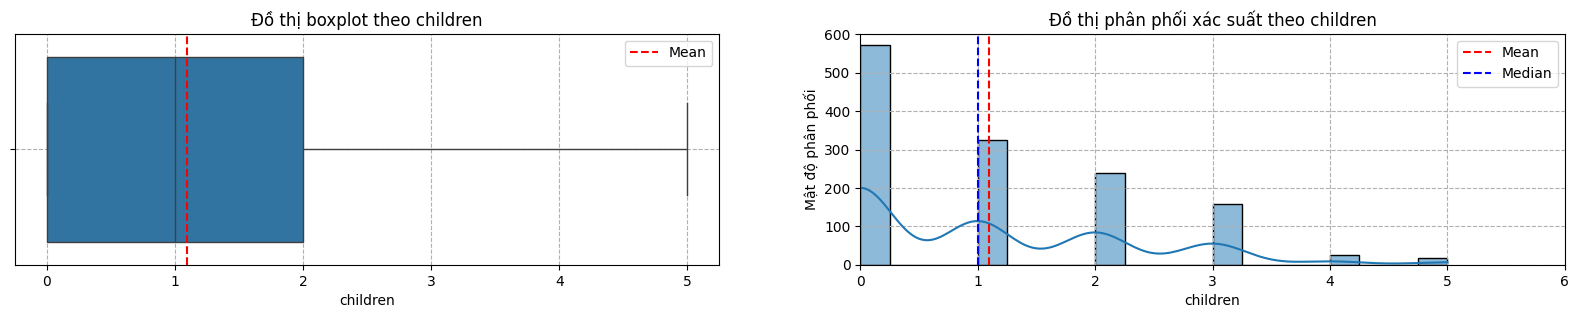

In [20]:
# Phân phối cột children:
visualize('children')

+ Số con trung bình khoảng 1 người.
+ Khoảng 25% khách hàng không có con, 75% có từ 2 con trở xuống --> tỉ lệ sinh khá thấp.
+ Đa số các khách hàng có 0-2 con
+ Mọi người có xu hướng đẻ ít con

*Ghi chú: Phần phân tích đa biến, sẽ xem xét việc tác động của ít con cái lên giá bảo hiểm*

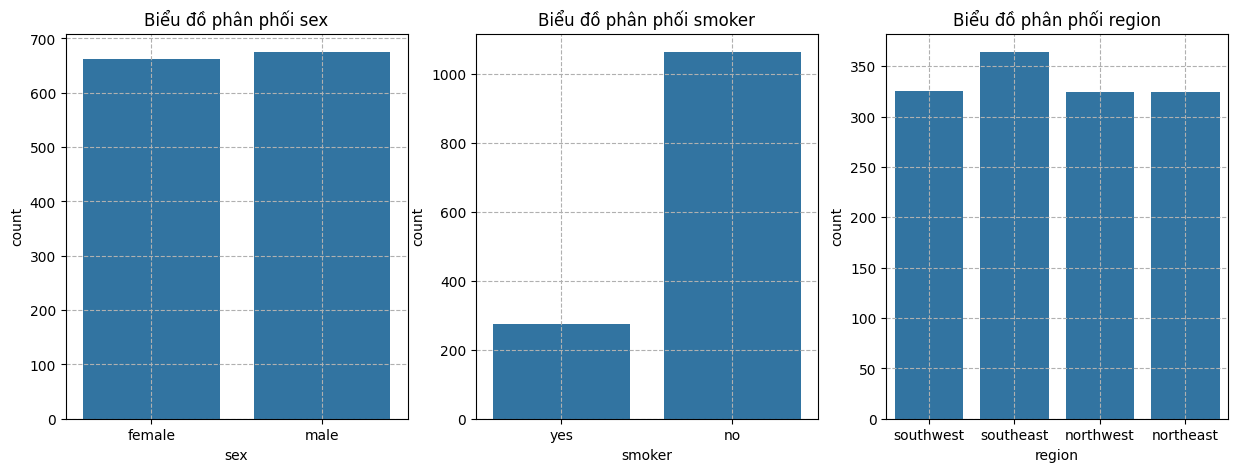

In [21]:
#Phân phối của 3 cột sex, smoker, region
columns_categories=['sex','smoker','region']
fig,ax=plt.subplots(1,3, figsize=(15,5))
for i,col in enumerate(columns_categories):
  sns.countplot(data=data,x=col, ax=ax[i])
  ax[i].set_title('Biểu đồ phân phối {}'.format(col))
  ax[i].grid(linestyle='--')

+ Sex:
  + Có 2 giá trị đại diện là male và female.
  + Với mode là 675 thì số lượng 2 giá trị trong cột này khá cân bằng.
  + Phân phối giới tính và vùng cư trú khá đồng đều.
+ Smoker:
  + Cột hút thuốc có 2 giá trị yes (có)/ no (không)
  + 2 giá trị này bị mất cân bằng, cụ thể là nghiêng về phía giá trị 'no' (1063)
  + Số lượng người hút thuốc chiếm khoảng 1/5 tổng số.

+ Region:
  + Phân phối vùng cư trú khá đồng đều
  + Giá trị có số lượng nhiều nhất là 'southeast' với 364 giá trị.
  


##2.4 Phân tích mô tả đa biến:

Text(0.5, 1.0, 'Heatmap biểu diễn mức độ tương quan giữa các biến dạng số')

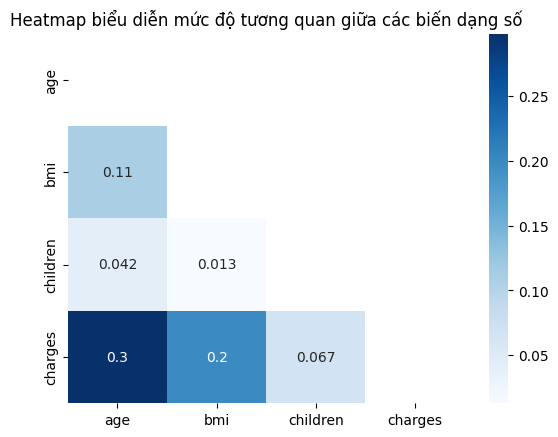

In [22]:
# Vẽ biểu đồ hệ số tương quan (correlation) giữa các biến số
mask=np.triu(np.ones_like(data.select_dtypes('number').corr(),dtype=bool))
sns.heatmap(data.select_dtypes('number').corr(), annot=True, mask=mask, cmap='Blues')
plt.title('Heatmap biểu diễn mức độ tương quan giữa các biến dạng số')

Nhận xét:
+ Các biến 'age', 'bmi', 'children' có tương quan tuyến tính dương với biến 'charges', mức độ tương quan giảm dần theo thứ tự, tuy nhiên hệ số tương quan giữa children và charges rất nhỏ nên hầu như không có ý nghĩa.
+  Các biến dự đoán bmi, children, age có tương quan với nhau nhưng hệ số tương quan rất nhỏ, chưa đủ để xuất hiện đa cộng tuyến nghiêm trọng nên ta có thể bỏ qua nó.

Giả thuyết:
1. **Biến 'age' và 'charges' có tương quan tuyến tính dương.**
2. **Biến 'bmi' và 'charges' có tương quan tuyến tính dương.**

Text(0.5, 1.0, 'Heatmap biểu diễn mức độ tương quan giữa các biến dạng danh mục')

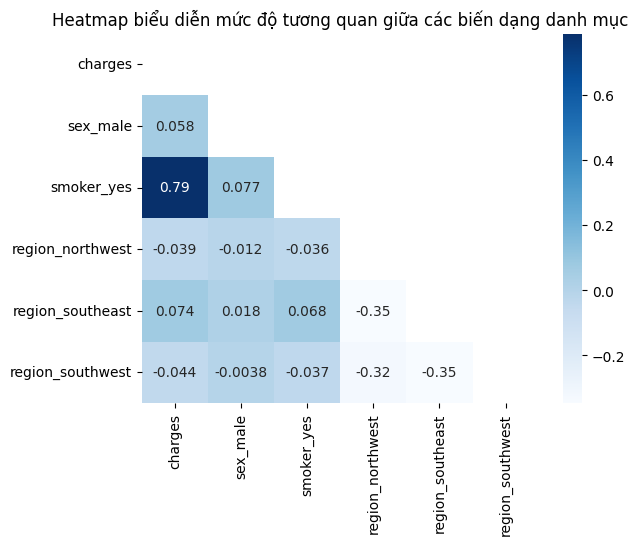

In [23]:
# Vẽ biểu đồ hệ số tương quan giữa các biến danh mục:
object_data=pd.get_dummies(pd.concat([data.select_dtypes('object'),data['charges']],axis=1), drop_first=True)
mask=np.triu(np.ones_like(object_data.corr(),dtype=bool))
sns.heatmap(object_data.corr(), annot=True, mask=mask, cmap='Blues')
plt.title('Heatmap biểu diễn mức độ tương quan giữa các biến dạng danh mục')

Nhận xét:
+ Biến 'smoker' có hệ số tương quan khá cao (0.79) với biến 'charges'.
+ Hệ số tương quan giữa 2 biến region_southwest và region_northwest là -0.32, region_southwest và region_southeast là -0.35, region_southest và region_northwest là -0.35 ---> hệ số này cho thấy mối tương quan âm yếu, không đủ để xuất hiện đa cộng tuyến.(2)


Giả thuyết:
3.  **Biến 'smoker' có tương quan tuyến tính dương mạnh với biến 'charges'.**

Ghi chú: Để kiểm tra kĩ nhận xét (2), ta có thể kiểm tra VIF các thành tố cột region:


In [24]:
# Kiểm tra đa cộng tuyến của các thành tố cột 'region'
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

region_data=pd.get_dummies(data['region'],drop_first=True).astype(int)
region_data=add_constant(region_data)

vif_region=pd.DataFrame()
vif_region['Variable']=region_data.columns
vif_region['VIF']=[variance_inflation_factor(region_data.values,i) for i in range(region_data.shape[1])]

vif_region

,Variable,VIF
0,const,4.126543
1,northwest,1.515333
2,southeast,1.545343
3,southwest,1.516173


+ 1< VIF < 5: mức độ đa cộng tuyến không nghiêm trọng
+ 5 ≤ VIF < 10: Mức độ đa cộng tuyến vừa phải, có thể cần xem xét lại mô hình.
+ VIF ≥ 10: Mức độ đa cộng tuyến nghiêm trọng, cần phải xử lý.

Theo bảng trên, mức độ đa cộng tuyến giữa các thành tố không nghiêm trọng nên có thể bỏ qua.

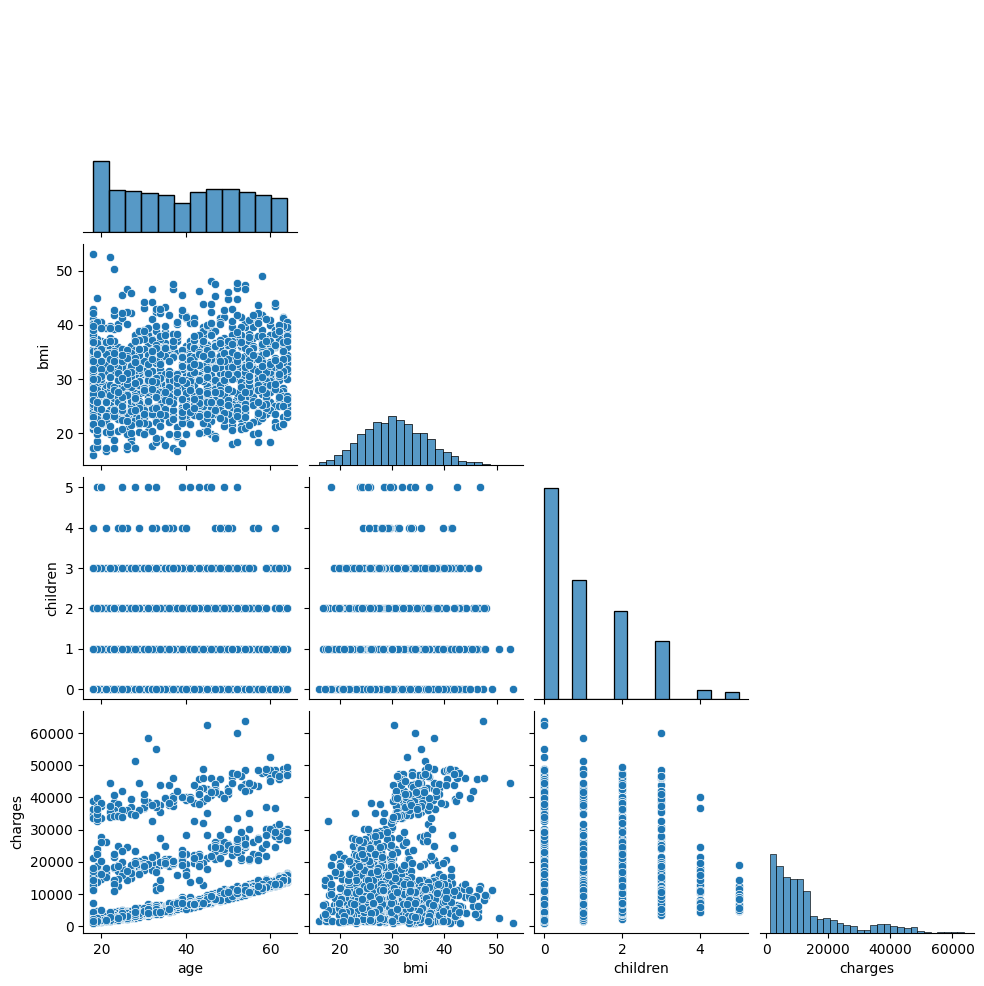

In [25]:
# Trực quan hóa mối quan hệ giữa các biến
sns.pairplot(data, corner=True)

**Kiểm định giả thuyết 1 & 3:**
+  **Biến 'age' và 'charges' có tương quan tuyến tính dương?**
+ **Biến 'smoker' có tương quan tuyến tính dương mạnh với biến 'charges'?**

Text(0.5, 1.0, 'Biểu đồ chi phí bảo hiểm trung bình theo độ tuổi')

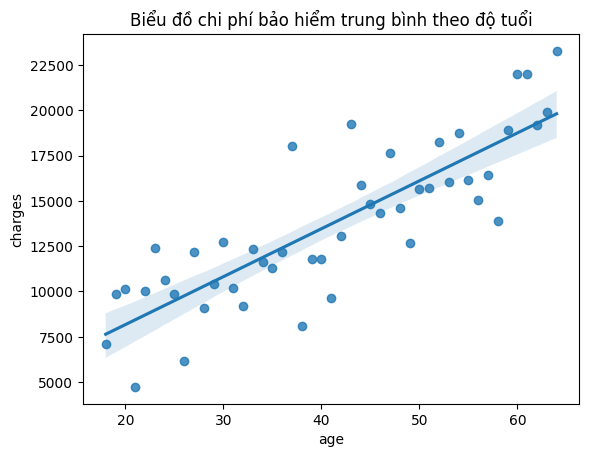

In [26]:
# Biểu đồ chi phí bảo hiểm trung bình theo độ tuổi:
mean_charges_age=data.groupby('age')['charges'].mean().reset_index()
sns.regplot(data=mean_charges_age, x='age', y='charges')
plt.title('Biểu đồ chi phí bảo hiểm trung bình theo độ tuổi')

+ Tuổi càng tăng thì phí bảo hiểm càng cao. Tuổi tác là yếu tố quan trọng ảnh hưởng đến chi phí bảo hiểm sức khỏe. Vì:
  + Rủi ro sức khỏe tăng: tuổi càng cao thì sức khỏe càng yếu, các cơ quan cơ thể già đi, tỷ lệ tái tạo kém dẫn tới dễ mắc bệnh nhưng khó phục hồi.
  + Các bệnh đa số người lớn tuổi mắc là tim mạch, ung thư, bệnh hô hấp,.. những bệnh này yêu cầu chi phí chữa trị cao. Chưa kể những bệnh mãn tính tái đi tái lại yêu cầu chi phí chữa trị cực kì cao và duy trì lâu dài.

*Kết luận: 2 biến "age" và "charges" có tương quan tuyến tính dương.*

Text(0.5, 1.0, 'Phân phối độ tuổi theo tình trạng hút thuốc')

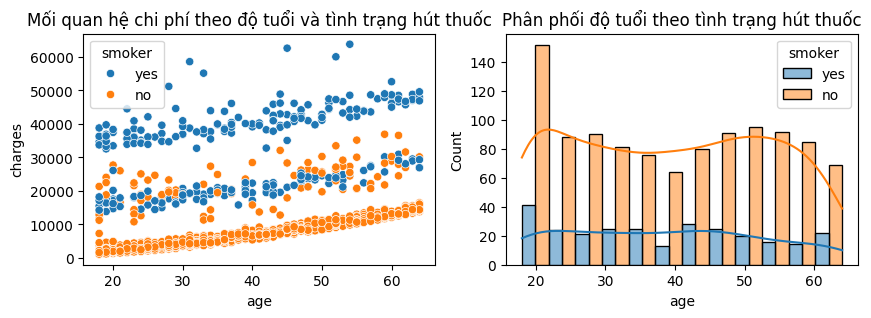

In [27]:
# Biểu đồ trực quan hóa chi phí bảo hiểm theo độ tuổi phân loại theo nhóm hút thuốc:
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.scatterplot(data=data,x='age', y='charges', hue='smoker', ax=ax[0])
ax[0].set_title('Mối quan hệ chi phí theo độ tuổi và tình trạng hút thuốc')
sns.histplot(data=data,x='age',hue='smoker', multiple='dodge',kde=True)
ax[1].set_title('Phân phối độ tuổi theo tình trạng hút thuốc')

 + Biểu đồ chia ra 2 nhóm phí cho người có hút thuốc và không hút thuốc, *phí bảo hiểm của nhóm người có hút thuốc cao hơn nhóm người không hút thuốc*. Có thể vì người hút thuốc lâu năm, đã tích tụ nhiều chất độc cho phổi, hệ hô hấp... dẫn đến nhóm người này có nguy cơ mắc bệnh ung thư phổi và các bệnh về đường hô hấp cao khi về già. Cho nên, chi phí bảo hiểm được điều chỉnh cao để đảm bảo cho các chi phí chữa bệnh nếu có.

 + Nhóm hút thuốc có các điểm dữ liệu phân tán nhiều hơn nhóm không hút thuốc. Cho nên nhóm không hút thuốc sẽ là biến giải thích biến "charges" tốt hơn.
 Để xác thực điều đó, ta tiến hành tính hệ số tương quan theo 2 nhóm có và không hút thuốc.

In [28]:
# Tính hệ số tương quan correlation giữa 2 biến age và charge theo smoker
data.groupby('smoker')[['age','charges']].corr()

age   charges
smoker                            
no     age      1.000000  0.627400
       charges  0.627400  1.000000
yes    age      1.000000  0.368224
       charges  0.368224  1.000000

+ Từ bảng hệ số tương quan trên, ta thấy nhóm không hút thuốc (0.627) có hệ số tương quan cao hơn nhóm có hút thuốc (0.368). Điều này có thể giải thích rằng với người có hút thuốc, tùy tình trạng hút thuốc bao lâu, sức khỏe hiện tại để áp dụng mức phí nên độ biến động cao hơn. Ví dụ với người trẻ tuổi hơn nhưng có thâm niên hút thuốc lâu hơn người già thì mức phí sẽ cao hơn vì rủi ro lớn hơn.

Note: Hệ số tương quan correlation thể hiện mức độ giải thích tuyến tính giữa 2 biến.

*Kết luận: Nhóm không hút thuốc có mức phí ổn định, ít biến động hơn nhóm có hút thuốc*

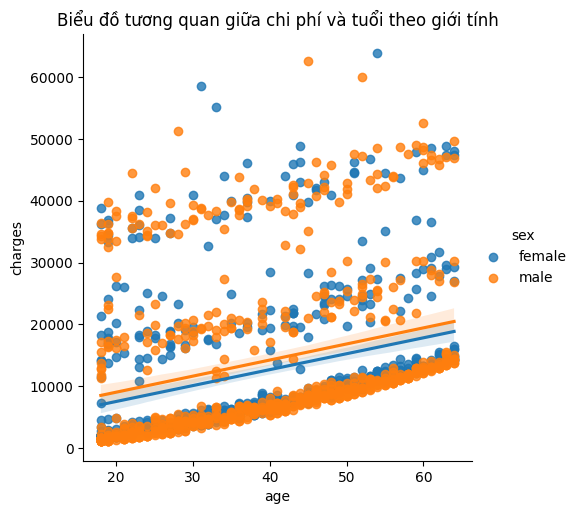

In [29]:
# Trực quan hóa biến tuổi và chi phí theo nhóm giới tính
sns.lmplot(data=data,x='age', y='charges', hue='sex')
plt.title('Biểu đồ tương quan giữa chi phí và tuổi theo giới tính')
plt.show()

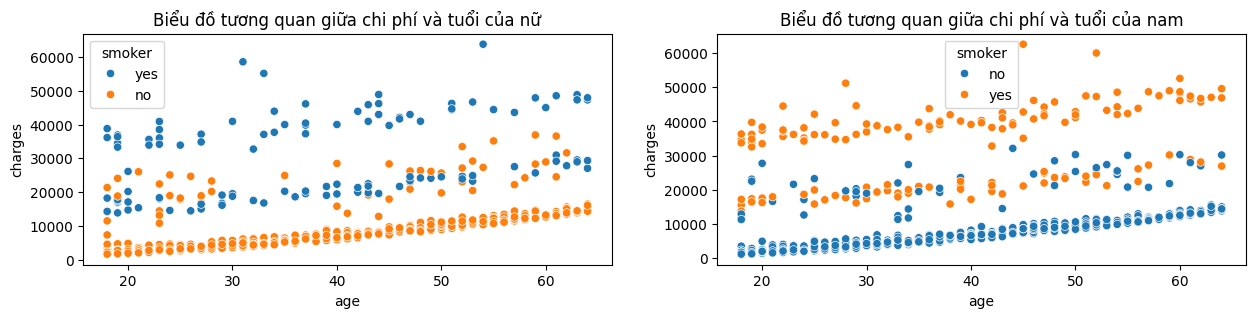

In [30]:
# Tách 2 biểu đồ ra theo giới tính
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.scatterplot(data=data[data['sex']=='female'],x='age',hue='smoker', y='charges', ax=ax[0])
ax[0].set_title('Biểu đồ tương quan giữa chi phí và tuổi của nữ')
sns.scatterplot(data=data[data['sex']=='male'],x='age', y='charges', hue='smoker', ax=ax[1])
ax[1].set_title('Biểu đồ tương quan giữa chi phí và tuổi của nam')
plt.show()


In [31]:
# Tính hệ số tương quan correlation giữa 2 biến age và charge theo sex
data.groupby('sex')[['age','charges']].corr()

age   charges
sex                               
female age      1.000000  0.324575
       charges  0.324575  1.000000
male   age      1.000000  0.280978
       charges  0.280978  1.000000

Theo Prudential.com "Mức độ rủi ro ở nam giới và nữ giới có sự chênh lệch do các yếu tố như cơ địa, môi trường làm việc, lối sống. Dù vậy, nam giới thường giữ vai trò là trụ cột trong gia đình. Vì thế, mức phí đóng bảo hiểm ở nam giới thường cao hơn nữ giới."

Nhưng với tập dữ liệu này có vẻ ngược lại. Nhìn chung, nữ giới có mức phí bảo hiểm cao hơn nam giới. Có thể lý do vì:
  + Phụ nữ thường có nguy cơ mắc bệnh mãn tính cao hơn, chẳng hạn các vấn đề liên quan đến hệ thống sinh sản.
  + Phụ nữ thường có xu hướng kĩ tính, quan tâm đến vấn đề sức khỏe nên thường sử dụng dịch vụ y tế để kiểm tra sức khỏe thường xuyên.
  + Về vấn đề thể chất, cơ thể nữ giới yếu hơn nam giới nên dễ mắc các vấn đề sức khỏe hơn.

+ Hệ số tương quan của nữ (0.324) cao hơn hệ số tương quan của nam (0.28). Sự khác nhau về hệ số tương quan này có thể do phần lớn nam có hút thuốc, mà như đã phân tích, việc hút thuốc tác động mạnh đến chi phí bảo hiểm. *Qua biểu đồ trên, 1 lần nữa nhấn mạnh yếu tố smoker*.

*Kết luận:*
+ *Nữ giới có mức phí bảo hiểm cao hơn nam giới (có thể chỉ với riêng tập dữ liệu này, cần nhiều dữ liệu hơn để kiểm định lại)*
+ *Mức phí bảo hiểm của nam giới biến động bất định hơn nữ giới*


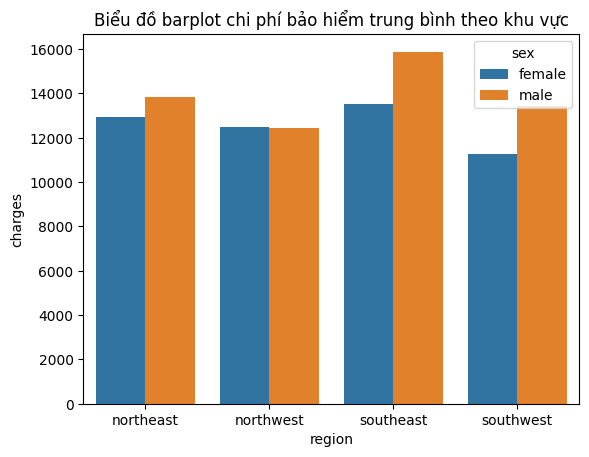

In [32]:
# Bảng chi phí bảo hiểm trung bình theo vùng cư trú và giới tính
mean_charges_region=data.groupby(['region','sex'])['charges'].mean().to_frame().reset_index()
mean_charges_region

# Trực quan hóa chi phí bảo hiểm trung bình theo vùng cư trú và giới tính
sns.barplot(data=mean_charges_region, x='region', y='charges', hue='sex')
plt.title('Biểu đồ barplot chi phí bảo hiểm trung bình theo khu vực')
plt.show()

+ *Vùng southwest có mức phí bảo hiểm trung bình cho nữ thấp nhất.*
+ *Vùng southeast có mức phí bảo hiểm trung bình cho cả nam và nữ cao nhất*

 Sự khác nhau về chi phí bảo hiểm giữa các vùng có thể do ảnh hưởng của:
  + Chênh lệch chi phí y tế, kinh tế
  + Tỷ lệ bệnh tật và tử vong
  + Yếu tố địa lý, môi trường như khí hậu, thiên tai
  + Cạnh tranh giữa các nhà cung cấp bảo hiểm

--> *Việc phát hiện điều này giúp công ty đưa ra giá cả phù hợp để cạnh tranh đồng thời giá cả đó cũng bù đắp được chi phí khi rủi ro xảy ra*.

**Kiểm định giả thuyết 2: Biến 'bmi' và 'charges' có tương quan tuyến tính dương?**

Text(0.5, 1.0, 'Biểu đồ giá trị phí bảo hiểm theo chỉ số bmi phân loại theo smoker')

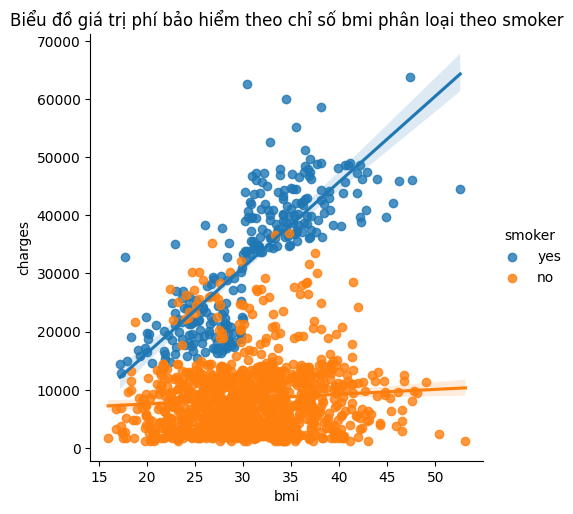

In [33]:
# Trực quan hóa biến bmi và charges theo nhóm smoker
sns.lmplot(data=data,x='bmi', y='charges', hue='smoker')
plt.title('Biểu đồ giá trị phí bảo hiểm theo chỉ số bmi phân loại theo smoker')

+ Đối với nhóm có hút thuốc, chi phí bảo hiểm tăng theo chỉ số BMI của khách hàng. Việc hút thuốc mang lại các tác nhân có hại cho sức khỏe làm tăng rủi ro y tế, không chỉ mang đến rủi ro ngắn hạn mà còn mang đến rủi ro dài hạn. Ngoài ra, người hút thuốc có tỉ lệ yêu cầu chi phí khám sức khỏe cao hơn vì các căn bệnh có khả năng mãn tính, tái đi tái lại.
+ Đối với nhóm không hút thuốc, chi phí bảo hiểm khá ổn định khi chỉ số BMI tăng.

*Kết luận:*
+ *Biến 'bmi' và 'charges' có tương quan tuyến tính dương, mức độ tương quan trong trường hợp có hút thuốc mạnh hơn*
+ *Có thể thấy biến "smoker" đóng vai trò quan trọng trong việc dự đoán biến "charges"*

Text(0.5, 1.0, 'Biểu đồ số lượng con theo tuổi và tình trạng hút thuôc')

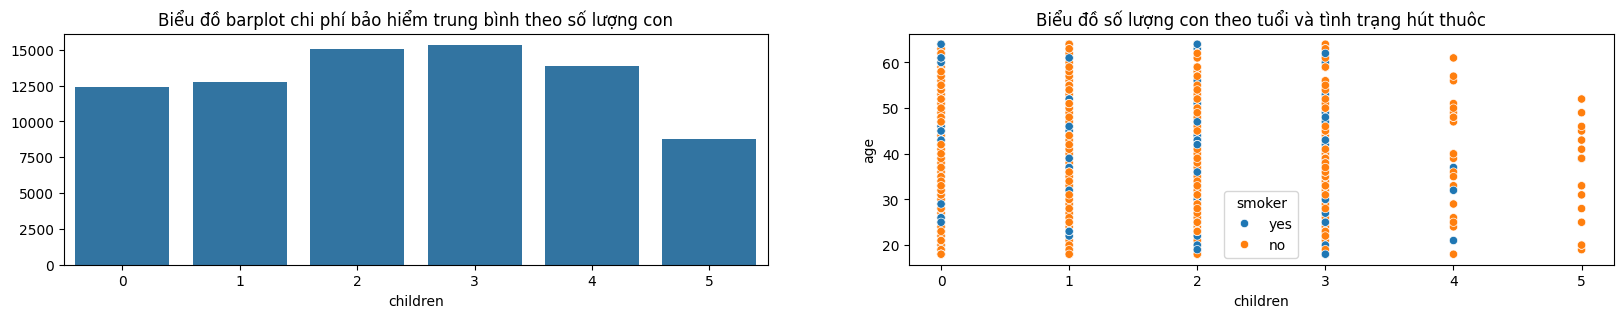

In [34]:
# Trực quan hóa chi phí bảo hiểm trung bình theo số con của khách hàng
fig,ax=plt.subplots(1,2,figsize=(20,3))
mean_charges_children=data.groupby('children')['charges'].mean()
sns.barplot( x=mean_charges_children.index, y=mean_charges_children.values, ax=ax[0])
ax[0].set_title('Biểu đồ barplot chi phí bảo hiểm trung bình theo số lượng con')

sns.scatterplot(data=data, x='children', y='age', hue='smoker', ax=ax[1])
ax[1].set_title('Biểu đồ số lượng con theo tuổi và tình trạng hút thuôc')


+ Khách hàng có từ 2-4 con phải trả chi phí bảo hiểm trung bình cao hơn phần còn lại.
Lý do có thể vì:
  + Gia đình có nhiều trẻ em phải đối diện với nhiều vấn đề sức khỏe hơn, do đó khả năng yêu cầu nhiều dịch vụ y tế hơn.
  + Đối với gia đình có nhiều thành viên, khả năng lây nhiễm bệnh lẫn nhau cao hơn.

*Kết luận:*
+ *'Children' và 'charges' có tương quan tuyến tính dương*
+ *Biến 'smoker' tương quan tuyến tính dương mạnh với 'charges'*

Ghi chú: dựa trên biểu đồ thứ 2, gia đình 5 con nhưng có phí bảo hiểm thấp hơn đáng kể so với phần còn lại vì những gia đình này không bị tác động bởi yếu tố hút thuốc.

##**Tóm tắt kết quả:**

1. 2 biến "age" và "charges" có tương quan tuyến tính dương.

2.  2 biến 'smoker' và 'charges' có tương quan tuyến tính dương mạnh nên biến "smoker" đóng vai trò quan trọng trong việc dự đoán biến "charges":
  + Phí bảo hiểm của nhóm người có hút thuốc cao hơn nhóm người không hút thuốc.
  + Nhóm không hút thuốc có mức phí ổn định, ít biến động.

3. Biến 'bmi' và 'charges' có tương quan tuyến tính dương, mức độ tương quan trong trường hợp có hút thuốc mạnh hơn.

4. 'Children' và 'charges' có tương quan tuyến tính dương nhưng không đáng kể.

5. Giới tính (sex):
  + Nữ giới có mức phí bảo hiểm cao hơn nam giới (có thể chỉ với riêng tập dữ liệu này, cần nhiều dữ liệu hơn để kiểm định lại).
  + Mức phí bảo hiểm của nam giới biến động bất định hơn nữ giới.

6. Vùng cư trú (region):
  + Vùng southwest có mức phí bảo hiểm trung bình cho nữ thấp nhất.
  + Vùng southeast có mức phí bảo hiểm trung bình cho cả nam và nữ cao nhất







#**Phần 3: Mô hình hóa dữ liệu:**

##3.1 Mã hóa dữ liệu


In [35]:
# Nhập các thư viện cần thiết
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [36]:
# Mã hóa các biến dạng danh mục thành các biến dạng số:
clean_data=pd.get_dummies(data, drop_first=True).astype(int)
clean_data.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


##3.2 Huấn luyện các mô hình dự đoán dữ liệu.

Gồm:

*   Mô hình LinearRegression
*   Mô Hình Ridge
*   Mô hình Lasso
*   Mô hình ElasticNet
*   DecisionTreeRegressor

In [37]:
# Hàm tự động hóa tính chỉ số cho các model:

def metrics_result(model,data,y_column,i):
  x_data=data.drop(columns=[y_column])
  y_data=data[y_column]

  poly=PolynomialFeatures(degree=i)
  x_data_poly=poly.fit_transform(x_data)
  x_data=pd.DataFrame(x_data_poly, columns=poly.get_feature_names_out(x_data.columns))

  x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)

  mse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)

  r2_cross=cross_val_score(model,x_data,y_data,cv=5, scoring='r2').mean()
  mae_cross=-(cross_val_score(model,x_data,y_data, cv=5, scoring='neg_mean_absolute_error').mean())
  mse_cross=-(cross_val_score(model,x_data,y_data, cv=5, scoring='neg_mean_squared_error').mean())

  result=pd.DataFrame({'model':[model,model],
                      'mse':[mse,mse_cross],
                      'mae':[mae,mae_cross],
                      'r2':[r2,r2_cross],
                       'mse~mae':[np.sqrt(mse)+mae,np.sqrt(mse)+mae],
                      'type':['single','cross'],
                       'degree':[i,i]})
  return result


In [38]:
# Nhập các model và huấn luyện tập dữ liệu
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

models=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), DecisionTreeRegressor()]
results=pd.DataFrame()
data= clean_data
y_column='charges'

for i in range(5):
  for model in models:
    result=metrics_result(model,clean_data,y_column,i)
    results=pd.concat([results,result], axis=0)

results

,model,mse,mae,r2,mse~mae,type,degree
0,LinearRegression(),1.642777e+08,9643.185476,-0.003163,22460.273593,single,0
1,LinearRegression(),1.465933e+08,9094.476429,-0.000688,22460.273593,cross,0
0,Ridge(),1.642777e+08,9643.185476,-0.003163,22460.273593,single,0
1,Ridge(),1.465933e+08,9094.476429,-0.000688,22460.273593,cross,0
0,Lasso(),1.642777e+08,9643.185476,-0.003163,22460.273593,single,0
1,Lasso(),1.465933e+08,9094.476429,-0.000688,22460.273593,cross,0
0,ElasticNet(),1.642777e+08,9643.185476,-0.003163,22460.273593,single,0
1,ElasticNet(),1.465933e+08,9094.476429,-0.000688,22460.273593,cross,0
0,DecisionTreeRegressor(),1.642777e+08,9643.185476,-0.003163,22460.273593,single,0
1,DecisionTreeRegressor(),1.465933e+08,9094.476429,-0.000688,22460.273593,cross,0


##3.3 Đánh giá và chọn mô hình

Text(0.5, 1.0, 'Biểu đồ hệ số r2 theo degree')

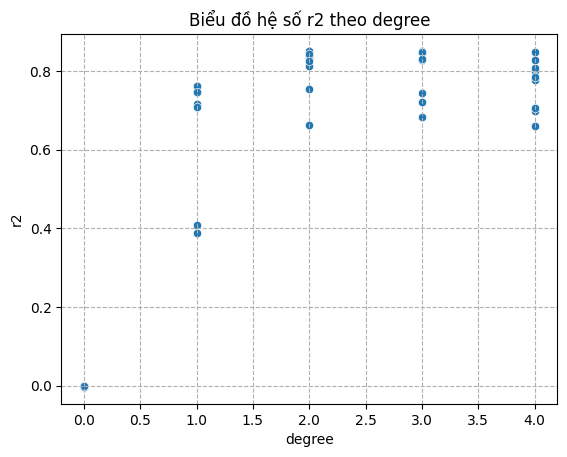

In [39]:
# Chọn hệ số dgree tối ưu cho việc PolynomialFeatures
sns.scatterplot(data=results, x='degree', y='r2')
plt.grid(linestyle='--')
plt.title('Biểu đồ hệ số r2 theo degree')

Từ đồ thị trên ta thấy với degree=2, hàm có hệ số r2 tối ưu nhất (khi degree tăng lên, r2 tăng lên không bao nhiêu nhưng phí tài nguyên tính toán nên chọn degree bằng 2)

In [40]:
i=2
results=pd.DataFrame()
for model in models:
  result=metrics_result(model,clean_data,y_column,i)
  results=pd.concat([results,result], axis=0)
results

,model,mse,mae,r2,mse~mae,type,degree
0,LinearRegression(),2.451426e+07,2975.986921,0.850304,7927.174317,single,2
1,LinearRegression(),2.749173e+07,3360.481738,0.811628,7927.174317,cross,2
0,Ridge(),2.441139e+07,2951.911948,0.850932,7892.700210,single,2
1,Ridge(),2.388274e+07,2937.189090,0.835894,7892.700210,cross,2
0,Lasso(),2.451494e+07,2976.056072,0.850299,7927.312158,single,2
1,Lasso(),2.387806e+07,2939.771512,0.835917,7927.312158,cross,2
0,ElasticNet(),2.583125e+07,3022.014542,0.842261,8104.459527,single,2
1,ElasticNet(),2.529090e+07,3046.006769,0.826134,8104.459527,cross,2
0,DecisionTreeRegressor(),4.080270e+07,3044.170813,0.750838,9431.870104,single,2
1,DecisionTreeRegressor(),4.667602e+07,3206.043251,0.684134,9431.870104,cross,2


In [41]:
#Sắp xếp lại mô hình:
results=results.sort_values(by=['r2','mse~mae'], ascending=[False,True]).reset_index().drop(columns=['index'])
results

,model,mse,mae,r2,mse~mae,type,degree
0,Ridge(),2.441139e+07,2951.911948,0.850932,7892.700210,single,2
1,LinearRegression(),2.451426e+07,2975.986921,0.850304,7927.174317,single,2
2,Lasso(),2.451494e+07,2976.056072,0.850299,7927.312158,single,2
3,ElasticNet(),2.583125e+07,3022.014542,0.842261,8104.459527,single,2
4,Lasso(),2.387806e+07,2939.771512,0.835917,7927.312158,cross,2
5,Ridge(),2.388274e+07,2937.189090,0.835894,7892.700210,cross,2
6,ElasticNet(),2.529090e+07,3046.006769,0.826134,8104.459527,cross,2
7,LinearRegression(),2.749173e+07,3360.481738,0.811628,7927.174317,cross,2
8,DecisionTreeRegressor(),4.080270e+07,3044.170813,0.750838,9431.870104,single,2
9,DecisionTreeRegressor(),4.667602e+07,3206.043251,0.684134,9431.870104,cross,2


Trên đây là bảng các chỉ số đánh giá của các model. Giải thích thông số:


*   R2: $ R^2 $ chỉ mức độ đóng góp của các biến phụ thuộc lên biến mục tiêu. $ R^2 $ càng lớn thì các biến dự đoán càng giải thích được nhiều cho biến mục tiêu 'charges'.

*   MAE: Trung bình tổng các giá trị tuyệt đối của hiệu giữa giá trị thực tế và giá trị dự đoán của biến mục tiêu charges. MAE càng nhỏ thì giá trị dự đoán càng gần giá trị thực tế.
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y_i} \right|
$$

*   MSE: Trung bình tổng bình phương của hiệu giữa giá trị thực tế và giá trị dự đoán của biến mục tiêu chargers. MSE càng nhỏ thì giá trị dự đoán càng gần giá trị thực tế.
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

*Kết luận: Theo bảng trên ta thấy model Ridge có các chỉ số tối ưu nhất. Cho nên ta sẽ chọn nó để dự đoán dữ liệu chi phí bảo hiểm.*

In [42]:
model_choose=results.head(1)
model_choose

,model,mse,mae,r2,mse~mae,type,degree
0,Ridge(),2.441139e+07,2951.911948,0.850932,7892.70021,single,2


##3.4 Đánh giá hiệu suất mô hình đã chọn dựa trên mô hình cơ bản:


+ Khái niệm: Mô hình cơ bản cho hồi quy tuyến tính là mô hình dự đoán tất cả giá trị mục tiêu bằng giá trị trung bình của biến mục tiêu.
+ Mục đích: So sánh hiệu suất. Để đánh giá mô hình tối ưu mới tìm ra, ta cần một cơ sở để so sánh. Nếu mô hình ta tìm ra không cải thiện hiệu suất hơn so với mô hình cơ bản thì cần phải xem xét lại mô hình đó vì nó chả mang ý nghĩa gì hơn 1 mô hình dự đoán ngẫu nhiên giá trị mục tiêu bằng 1 số cố định.

In [43]:
# Tìm chỉ số đánh giá cho mô hình chuẩn:
x_data=clean_data.drop(columns='charges')
y_data=clean_data['charges']
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)
y_pred=np.full_like(y_test,np.mean(y_test))
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
result=pd.DataFrame({'model':['BaseModel'],
                    'mse':[mse],
                    'mae':[mae],
                    'r2':[r2],
                    'type':['single']})

In [44]:
ss=pd.concat([model_choose,result], axis=0)
ss

,model,mse,mae,r2,mse~mae,type,degree
0,Ridge(),2.441139e+07,2951.911948,8.509318e-01,7892.70021,single,2.0
0,BaseModel,1.637598e+08,9886.639303,-5.089471e-09,NaN,single,NaN


Theo bảng trên, ta thấy model được chọn hoạt động tốt trên tập dữ liệu vì tất cả mọi chỉ số đều tối ưu hơn mô hình cơ bản.

##3.5 Trực quan hóa kết quả

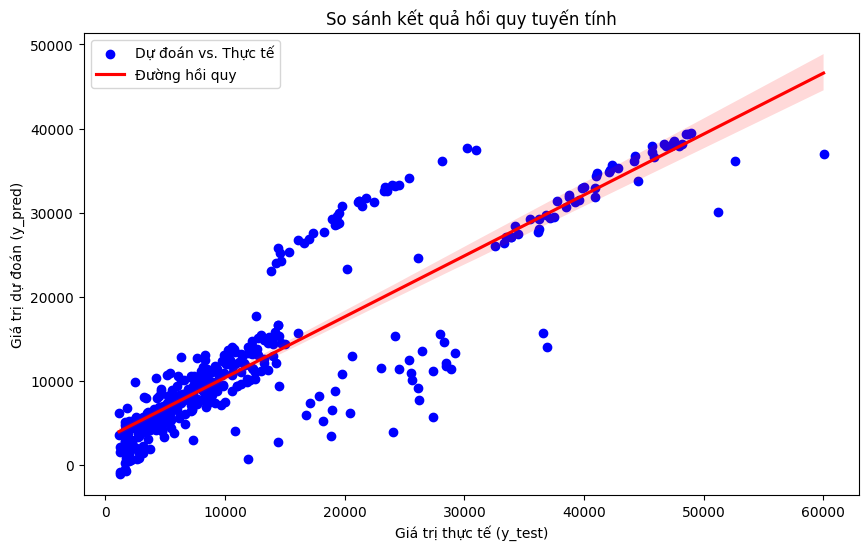

In [45]:
# Trực quan hóa kết quả dự đoán
model=model_choose.loc[0,'model']
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Vẽ biểu đồ phân tán y_test và y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Dự đoán vs. Thực tế')

# Vẽ đường hồi quy
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Đường hồi quy')

# Thêm tiêu đề và nhãn
plt.title('So sánh kết quả hồi quy tuyến tính')
plt.xlabel('Giá trị thực tế (y_test)')
plt.ylabel('Giá trị dự đoán (y_pred)')
plt.legend()

# Hiển thị biểu đồ
plt.show()


Phân tích thành phần:
 + Các điểm dữ liệu màu xanh biểu diễn giá trị dự đoán so với thực tế
 + Đường màu đỏ là đường hồi quy tuyến tính biểu diễn mối quan hệ giữa giá trị dự đoán và giá trị thực tế.
 + Dải hồng nhạt biểu diễn khoảng tin cậy cho đường hồi quy

Rút ra nhận xét:
 + Xu hướng phân bố: Các điểm dữ liệu nằm phân tán khá gần đường tuyến tính dùng để dự đoán màu đỏ cho thấy mô hình hồi quy tuyến tính dự đoán tương đối chính xác.
 + Tuy nhiên vẫn có 1 số cụm, dải dữ liệu nằm xa cho thấy có thể trong quá trình xử lý đầu vào đã bỏ lỡ yếu tố đặc biệt nào đó.
 + Phân bố: Ở giá trị thấp, các điểm dữ liệu tập trung thành cụm khá gần nhau, giá trị trung bình các điểm dữ liệu nằm thành dải song song với đường hồi quy, giá trị cao: các điểm đa số nằm trên đường hồi quy.

*Kết luận: Từ trên ta thấy mô hình có vẻ hoạt động tốt trên giá trị thấp và cao, chưa tốt lắm trên giá trị trung bình.*

###Phương trình hàm dự đoán:

In [46]:
# Phương trình hàm dự đoán:
def y_function(model):
  y_function=pd.DataFrame({'Feature_name':x_test.columns, 'Coef':model.coef_})
  y_function['abs(coef)']=np.abs(model.coef_)
  y_function.sort_values(by='abs(coef)', ascending=False, inplace=True)
  y_function=y_function.reset_index().drop(columns=['index','abs(coef)'])
  y_function=pd.concat([y_function,pd.DataFrame({'Feature_name':['intercept'],'Coef':model.intercept_})], axis=0)
  return round(y_function,0)

y_function(model)


,Feature_name,Coef
0,smoker_yes,23468.0
1,region_southwest,-1261.0
2,region_southeast,-794.0
3,region_northwest,-561.0
4,children,475.0
5,bmi,293.0
6,age,243.0
7,sex_male,-76.0
0,intercept,-9926.0


Phương trình giá trị charges có dạng:

**charges = -9926 + 23468smoker_yes - 1261region_southwest -794region_southeast - 561region_northwest + 475children + 293bmi + 243age -76sex_male**

Ví dụ: Với 1 khách hàng có hút thuốc, phí bảo hiểm sẽ lớn hơn khách hàng không hút thuốc là 23468 USD.

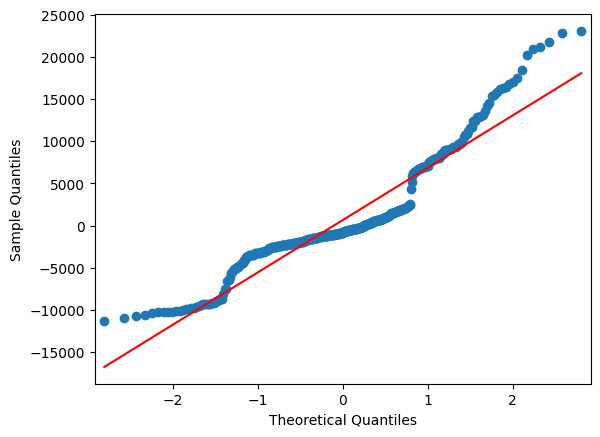

In [47]:
#Biểu đồ Q-Q của số dư:
import statsmodels.api as sm
residual=y_test-y_pred
fig=sm.qqplot(residual, line='s')

##3.6 Trực quan hóa mức đóng góp của biến dự đoán lên biến mục tiêu:

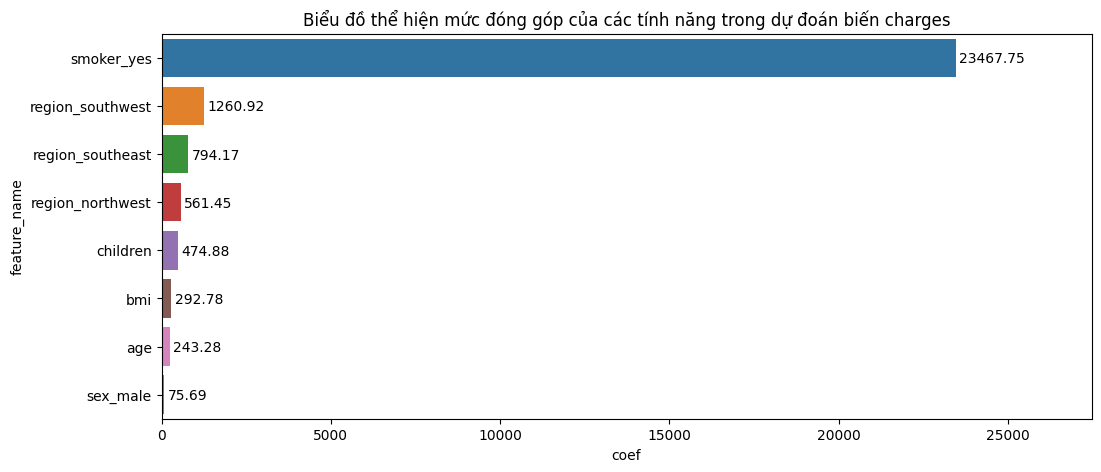

In [48]:
# Trực quan hóa mức độ đóng góp của biến dự đoán.
coefs=np.abs(model.coef_)
feature_names=x_test.columns

coef_df=pd.DataFrame({'feature_name':feature_names,'coef':coefs})
coef_df.sort_values(by=['coef'],ascending=False,inplace=True )
coef_df=coef_df.reset_index().drop(columns=['index'])

fig, ax=plt.subplots(figsize=(12,5))
ax=sns.barplot(x='coef',y='feature_name',data=coef_df,hue='feature_name')
for i,bar in enumerate(ax.patches):
  plt.text(round(coef_df.loc[i,'coef'],2)+100,bar.get_y()+0.5,round(coef_df.loc[i,'coef'],2))
plt.xlim(0,coef_df['coef'].max()+4000)

plt.title('Biểu đồ thể hiện mức đóng góp của các tính năng trong dự đoán biến charges')
plt.show()


Nhìn biểu đồ trên ta xác nhận được thông tin biến 'smoker' đóng vai trò chính trong việc dự đoán biến 'charges' như đã phân tích ở phần phân tích đa biến.
Những biến còn lại cũng có sự đóng góp nhưng chiếm tỷ trọng không đáng kể.

# **Phần 4: Kết luận**

##4.1 Tóm tắt phát hiện:

Dưới đây là tóm tắt về các phát hiện từ phân tích chi phí bảo hiểm sức khỏe theo thứ tự mức độ đóng góp giữa các biến:



1.  Tác động của việc hút thuốc:

+ Người hút thuốc có phí bảo hiểm cao hơn người không hút thuốc do nguy cơ mắc các bệnh nghiêm trọng và chi phí chữa trị cao hơn.
+ Nhóm người hút thuốc có dữ liệu biến động nhiều hơn, do đó phí bảo hiểm có thể biến động cao hơn so với nhóm không hút thuốc khi tuổi tác tăng.



2.   Tác động của vùng địa lý:

+ Vùng Tây Nam (Southwest) có mức phí bảo hiểm trung bình cho nữ thấp nhất, trong khi vùng Đông Nam (Southeast) có mức phí bảo hiểm trung bình cao nhất cho cả nam và nữ.
+ Sự khác biệt về chi phí bảo hiểm giữa các vùng có thể do chênh lệch chi phí y tế, tỷ lệ bệnh tật, yếu tố địa lý và sự cạnh tranh giữa các nhà cung cấp bảo hiểm.



3. Ảnh hưởng của số con cái:

+ Gia đình có từ 2-4 con có mức phí bảo hiểm trung bình cao hơn do nhu cầu dịch vụ y tế tăng cao hơn và khả năng lây nhiễm bệnh cao hơn.
+ Gia đình có 5 con có phí bảo hiểm thấp hơn đáng kể, vì nhóm này ít bị ảnh hưởng bởi yếu tố hút thuốc.(Tập dữ liệu này cho thông tin là vậy nhưng vì kích thước dữ liệu còn nhỏ nên có lẽ cần thêm dữ liệu để chứng thực thông tin này)


4. Tác động của chỉ số BMI:

+ Đối với người hút thuốc, phí bảo hiểm tăng theo chỉ số BMI do các rủi ro sức khỏe cao hơn.
+ Đối với người không hút thuốc, phí bảo hiểm ít bị ảnh hưởng bởi chỉ số BMI.



5. Tương quan giữa tuổi và phí bảo hiểm:

+ Tuổi càng cao thì phí bảo hiểm càng cao do nguy cơ mắc bệnh tăng lên với tuổi tác. Các bệnh lý phổ biến ở người lớn tuổi như tim mạch, ung thư và bệnh hô hấp thường đòi hỏi chi phí chữa trị cao hơn.



6. Phí bảo hiểm theo giới tính:

+ Nữ giới thường có mức phí bảo hiểm cao hơn nam giới. Nguyên nhân có thể là do nguy cơ mắc bệnh mãn tính cao hơn, việc sử dụng dịch vụ y tế thường xuyên hơn, và thể chất yếu hơn.
+ Hệ số tương quan giữa tuổi tác và phí bảo hiểm cao hơn ở nữ giới (0.324) so với nam giới (0.28). Sự khác biệt này có thể liên quan đến việc hút thuốc phổ biến hơn ở nam giới.







**Kết luận: Biến "smoker" đóng vai trò quan trọng trong việc dự đoán phí bảo hiểm, và yếu tố tuổi tác, giới tính, vùng địa lý, chỉ số BMI, và số lượng con cái đều ảnh hưởng đến phí bảo hiểm sức khỏe nhưng góp phần không đáng kể.**

##4.2 Đề xuất giải pháp:

Trước khi ký kết hợp đồng bảo hiểm sức khỏe, hầu hết các công ty bảo hiểm đều tiến hành điều tra về tình hình sức khỏe của khách hàng. Mục đích chính của việc điều tra này là để đánh giá mức độ rủi ro mà khách hàng mang lại, từ đó xác định phí bảo hiểm phù hợp và loại trừ những trường hợp không đủ điều kiện tham gia bảo hiểm. Tuy nhiên, các công ty cũng cần cân đo mức phí để cạnh tranh với các đối thủ trên thị trường.

Dựa trên những phân tích ở trên, dưới đây là một số giải pháp đề xuất:

1. **Điều tra kỹ tình trạng sức khỏe khách hàng** tại thời điểm mua bảo hiểm đặc biệt là việc có hút thuốc hay không:
+ Với khách hàng không hút thuốc: kiểm tra lịch sử bệnh án, thói quen sinh hoạt, nghề nghiệp, lịch sử bệnh gia đình, bản tình trạng sức khỏe hiện tại...
+ Với khách hàng có hút thuốc, kiểm tra thêm thời gian sử dụng thuốc lá, thói quen và tần suất hút thuốc.

2. **Điều chỉnh chi phí để cạnh tranh:** Dựa trên các yếu tố:
+ Tình trạng sức khỏe:
  + Tăng cường phân tích rủi ro theo độ tuổi và tình trạng hút thuốc: Xem xét việc áp dụng mức phí bảo hiểm theo nhóm tuổi cụ thể và tình trạng hút thuốc để phản ánh chính xác rủi ro.
  + Giảm phí cho nhóm không hút thuốc: Cung cấp mức phí bảo hiểm thấp hơn cho người không hút thuốc hoặc khuyến khích bỏ thuốc lá bằng cách cung cấp ưu đãi, các chương trình hỗ trợ cai thuốc.

+ Vùng địa lý:
  + Xem xét chênh lệch khu vực: Tinh chỉnh mức phí bảo hiểm theo vùng địa lý để phù hợp với chênh lệch chi phí y tế và các yếu tố địa lý khác.
  + Cải thiện phân tích khu vực: Phân tích chi tiết hơn về yếu tố địa lý để đưa ra các điều chỉnh hợp lý cho phí bảo hiểm trong các vùng khác nhau.

+ Chỉ số BMI:
  + Theo dõi chỉ số BMI và phí bảo hiểm: Đối với nhóm hút thuốc, điều chỉnh phí bảo hiểm theo chỉ số BMI để phản ánh rủi ro sức khỏe cao hơn.
  + Cung cấp hỗ trợ về sức khỏe: Cung cấp các chương trình sức khỏe và dinh dưỡng cho khách hàng để giảm thiểu rủi ro và chi phí bảo hiểm.

+ Tạo ra các gói bảo hiểm linh hoạt cho gia đình:
  + Cung cấp các gói bảo hiểm cho gia đình: Đưa ra các gói bảo hiểm đặc biệt cho gia đình có nhiều con cái với các mức phí hợp lý hơn.
  + Khuyến khích kiểm tra sức khỏe định kỳ: Cung cấp các dịch vụ y tế và kiểm tra sức khỏe định kỳ cho các gia đình để phát hiện sớm các vấn đề sức khỏe, giảm thiểu chi phí.

3. **Tăng cường chiến lược tiếp thị và giáo dục:**

+ Giáo dục khách hàng: Tăng cường chiến lược giáo dục về rủi ro sức khỏe và lợi ích của việc duy trì lối sống lành mạnh.
+ Chiến lược tiếp thị mục tiêu: Tập trung vào các nhóm khách hàng có nguy cơ cao để tăng cường nhận thức và cung cấp các giải pháp bảo hiểm phù hợp.



Bằng cách thực hiện các giải pháp này, công ty bảo hiểm có thể cải thiện hiệu quả quản lý rủi ro, tăng tính cạnh tranh và cung cấp dịch vụ tốt hơn cho khách hàng.
